In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936) 
  
# data (as pandas dataframes) 
X = national_poll_on_healthy_aging_npha.data.features 
y = national_poll_on_healthy_aging_npha.data.targets 
  
# metadata 
print(national_poll_on_healthy_aging_npha.metadata) 
  
# variable information 
print(national_poll_on_healthy_aging_npha.variables) 

{'uci_id': 936, 'name': 'National Poll on Healthy Aging (NPHA)', 'repository_url': 'https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)', 'data_url': 'https://archive.ics.uci.edu/static/public/936/data.csv', 'abstract': 'This is a subset of the NPHA dataset filtered down to develop and validate machine learning algorithms for predicting the number of doctors a survey respondent sees in a year. This dataset’s records represent seniors who responded to the NPHA survey.\n', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 714, 'num_features': 14, 'feature_types': ['Categorical'], 'demographics': ['Age', 'Race', 'Gender'], 'target_col': ['Number_of_Doctors_Visited'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Mon Dec 11 2023', 'dataset_doi': 'https://doi.org/10.3886/ICPSR37305.v1', 'creators': [], 'intro_paper': {'title'

In [3]:
print(X)

     Age  Physical_Health  Mental_Health  Dental_Health  Employment  \
0      2                4              3              3           3   
1      2                4              2              3           3   
2      2                3              2              3           3   
3      2                3              2              3           3   
4      2                3              3              3           3   
..   ...              ...            ...            ...         ...   
709    2                2              2              2           3   
710    2                2              2              2           2   
711    2                4              2              3           3   
712    2                3              1              3           3   
713    2                3              2              2           1   

     Stress_Keeps_Patient_from_Sleeping  \
0                                     0   
1                                     1   
2                 

In [4]:
print(y)

     Number_of_Doctors_Visited
0                            3
1                            2
2                            3
3                            1
4                            3
..                         ...
709                          2
710                          3
711                          3
712                          3
713                          2

[714 rows x 1 columns]


In [5]:
# Summary statistics for numerical columns
print(y.dtypes)

print(X.dtypes)

Number_of_Doctors_Visited    int64
dtype: object
Age                                           int64
Physical_Health                               int64
Mental_Health                                 int64
Dental_Health                                 int64
Employment                                    int64
Stress_Keeps_Patient_from_Sleeping            int64
Medication_Keeps_Patient_from_Sleeping        int64
Pain_Keeps_Patient_from_Sleeping              int64
Bathroom_Needs_Keeps_Patient_from_Sleeping    int64
Uknown_Keeps_Patient_from_Sleeping            int64
Trouble_Sleeping                              int64
Prescription_Sleep_Medication                 int64
Race                                          int64
Gender                                        int64
dtype: object


In [6]:
import pandas as pd

columns_to_convert = [
    'Age',
    'Physical_Health',
    'Mental_Health',
    'Dental_Health',
    'Employment',
    'Stress_Keeps_Patient_from_Sleeping',
    'Medication_Keeps_Patient_from_Sleeping',
    'Pain_Keeps_Patient_from_Sleeping',
    'Bathroom_Needs_Keeps_Patient_from_Sleeping',
    'Uknown_Keeps_Patient_from_Sleeping',  # Corrected column name
    'Trouble_Sleeping',
    'Prescription_Sleep_Medication',
    'Race',
    'Gender'
]


df = pd.DataFrame(X, columns=columns_to_convert)

print(df)

     Age  Physical_Health  Mental_Health  Dental_Health  Employment  \
0      2                4              3              3           3   
1      2                4              2              3           3   
2      2                3              2              3           3   
3      2                3              2              3           3   
4      2                3              3              3           3   
..   ...              ...            ...            ...         ...   
709    2                2              2              2           3   
710    2                2              2              2           2   
711    2                4              2              3           3   
712    2                3              1              3           3   
713    2                3              2              2           1   

     Stress_Keeps_Patient_from_Sleeping  \
0                                     0   
1                                     1   
2                 

In [7]:
print(df.dtypes)

Age                                           int64
Physical_Health                               int64
Mental_Health                                 int64
Dental_Health                                 int64
Employment                                    int64
Stress_Keeps_Patient_from_Sleeping            int64
Medication_Keeps_Patient_from_Sleeping        int64
Pain_Keeps_Patient_from_Sleeping              int64
Bathroom_Needs_Keeps_Patient_from_Sleeping    int64
Uknown_Keeps_Patient_from_Sleeping            int64
Trouble_Sleeping                              int64
Prescription_Sleep_Medication                 int64
Race                                          int64
Gender                                        int64
dtype: object


In [8]:
# Convert specified columns to int64
y_columns_to_convert = [
    'Number_of_Doctors_Visited'
]

dy = pd.DataFrame(y, columns=y_columns_to_convert)

print(dy)

     Number_of_Doctors_Visited
0                            3
1                            2
2                            3
3                            1
4                            3
..                         ...
709                          2
710                          3
711                          3
712                          3
713                          2

[714 rows x 1 columns]


In [9]:
# concatenate the two dataframes dy and df together

data = pd.concat([dy, df], axis=1)

print(data)

     Number_of_Doctors_Visited  Age  Physical_Health  Mental_Health  \
0                            3    2                4              3   
1                            2    2                4              2   
2                            3    2                3              2   
3                            1    2                3              2   
4                            3    2                3              3   
..                         ...  ...              ...            ...   
709                          2    2                2              2   
710                          3    2                2              2   
711                          3    2                4              2   
712                          3    2                3              1   
713                          2    2                3              2   

     Dental_Health  Employment  Stress_Keeps_Patient_from_Sleeping  \
0                3           3                                   0   
1      

In [10]:
# Summary statistics for numerical columns
summary_statistics = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

print("Summary Statistics:\n", summary_statistics)
print("\nMissing Values:\n", missing_values)

Summary Statistics:
        Number_of_Doctors_Visited    Age  Physical_Health  Mental_Health  \
count                 714.000000  714.0       714.000000     714.000000   
mean                    2.112045    2.0         2.794118       1.988796   
std                     0.683441    0.0         0.900939       0.939928   
min                     1.000000    2.0        -1.000000      -1.000000   
25%                     2.000000    2.0         2.000000       1.000000   
50%                     2.000000    2.0         3.000000       2.000000   
75%                     3.000000    2.0         3.000000       3.000000   
max                     3.000000    2.0         5.000000       5.000000   

       Dental_Health  Employment  Stress_Keeps_Patient_from_Sleeping  \
count     714.000000  714.000000                          714.000000   
mean        3.009804    2.806723                            0.247899   
std         1.361117    0.586582                            0.432096   
min        -1.0

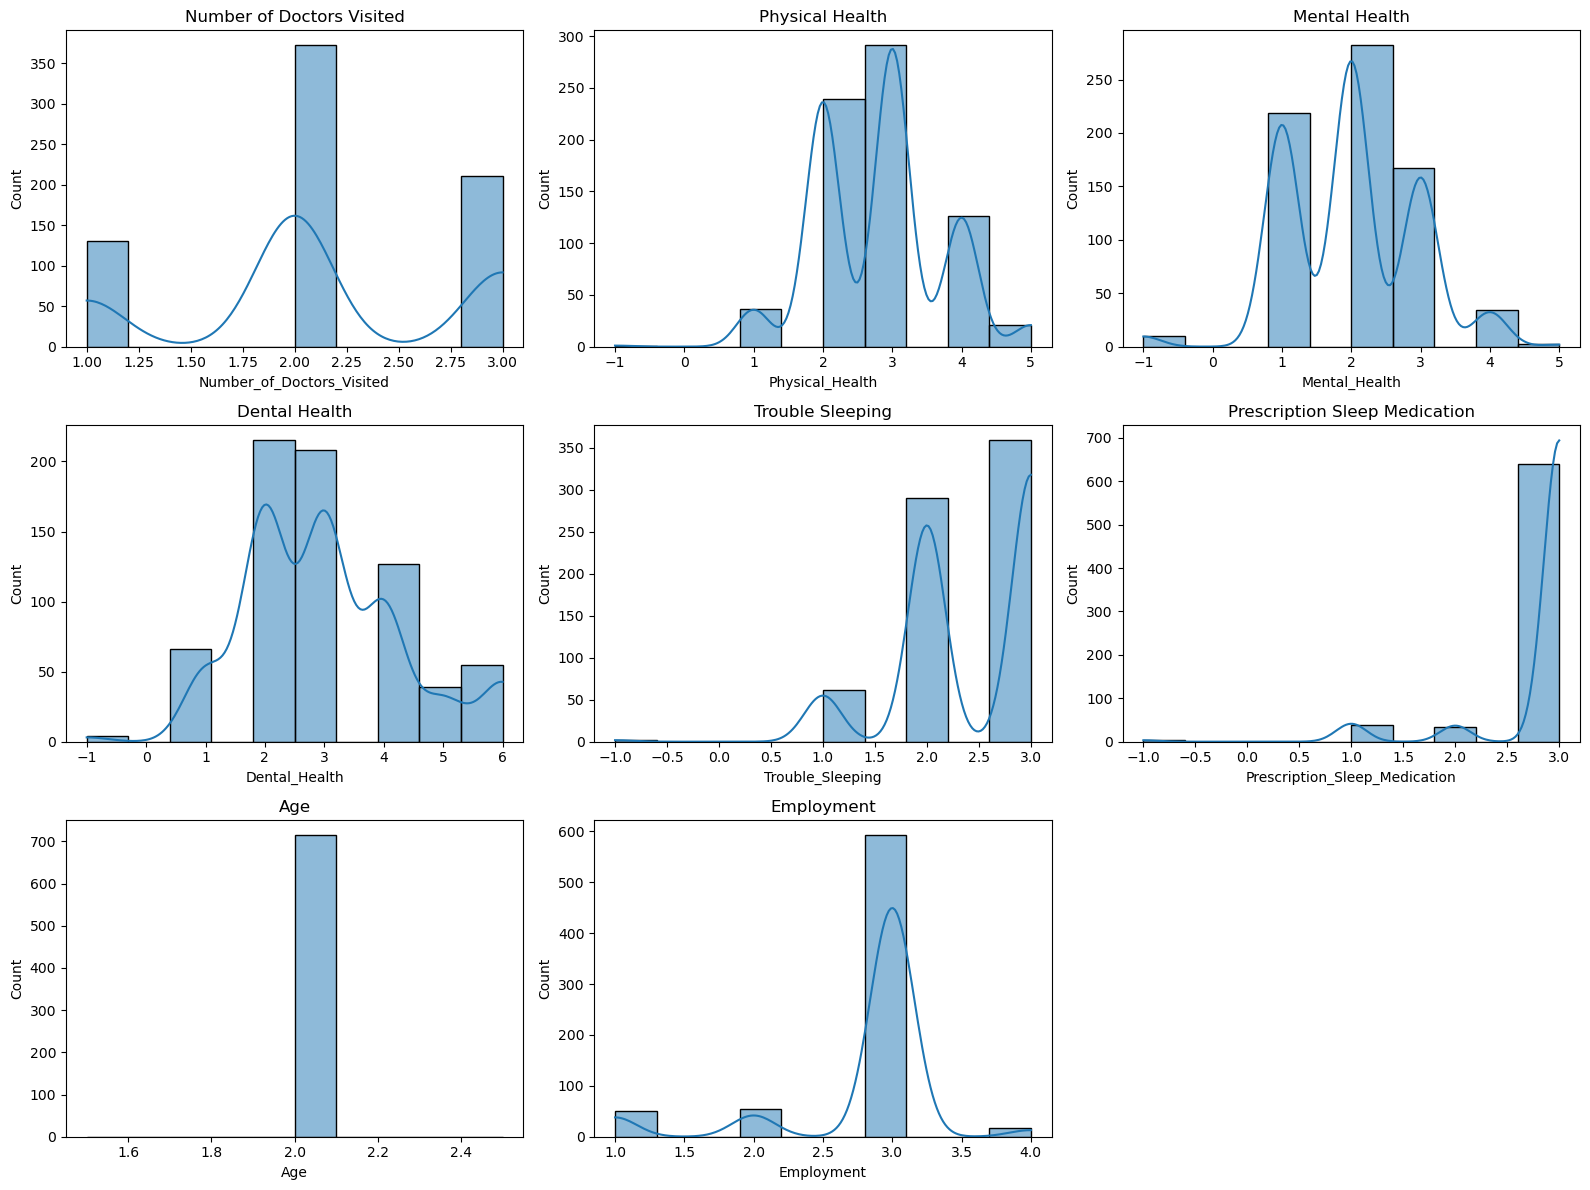

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(16, 12))

# Plot histograms for key variables
plt.subplot(3, 3, 1)
sns.histplot(data['Number_of_Doctors_Visited'], kde=True, bins=10)
plt.title('Number of Doctors Visited')

plt.subplot(3, 3, 2)
sns.histplot(data['Physical_Health'], kde=True, bins=10)
plt.title('Physical Health')

plt.subplot(3, 3, 3)
sns.histplot(data['Mental_Health'], kde=True, bins=10)
plt.title('Mental Health')

plt.subplot(3, 3, 4)
sns.histplot(data['Dental_Health'], kde=True, bins=10)
plt.title('Dental Health')

plt.subplot(3, 3, 5)
sns.histplot(data['Trouble_Sleeping'], kde=True, bins=10)
plt.title('Trouble Sleeping')

plt.subplot(3, 3, 6)
sns.histplot(data['Prescription_Sleep_Medication'], kde=True, bins=10)
plt.title('Prescription Sleep Medication')

plt.subplot(3, 3, 7)
sns.histplot(data['Age'], kde=True, bins=10)
plt.title('Age')

plt.subplot(3, 3, 8)
sns.histplot(data['Employment'], kde=True, bins=10)
plt.title('Employment')

plt.tight_layout()
plt.show()

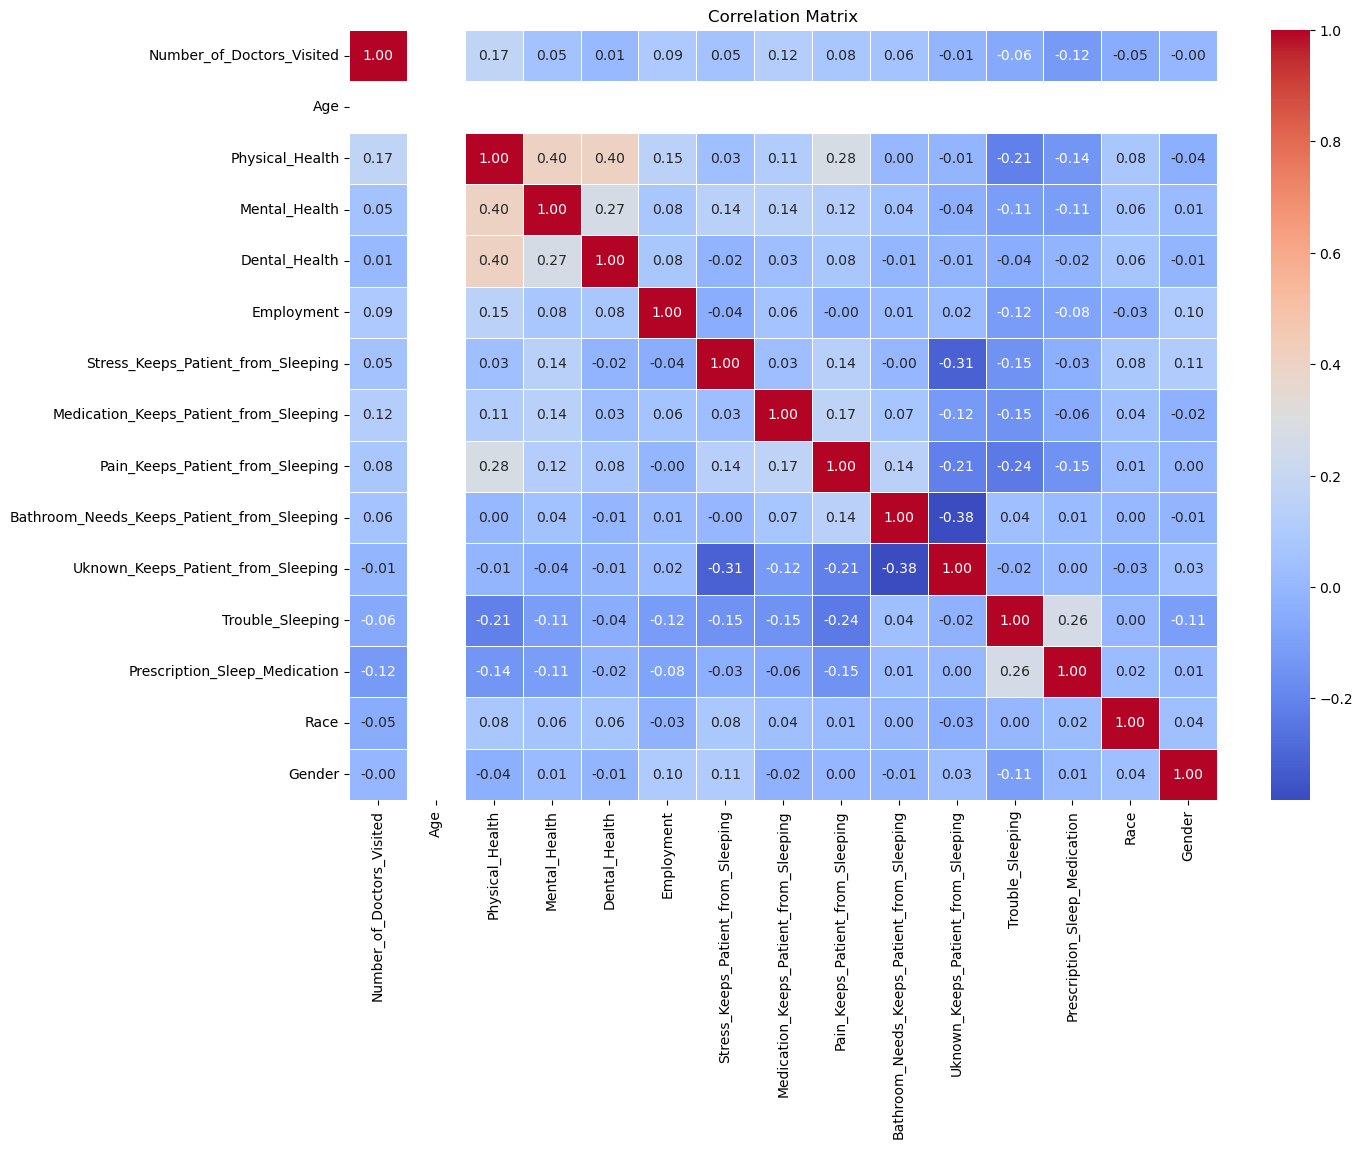

In [12]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the plotting area
plt.figure(figsize=(14, 10))

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# create a simple classification model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Race', 'Gender']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('Number_of_Doctors_Visited', axis=1)
y = data['Number_of_Doctors_Visited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Missing values:
 Number_of_Doctors_Visited                     0
Age                                           0
Physical_Health                               0
Mental_Health                                 0
Dental_Health                                 0
Employment                                    0
Stress_Keeps_Patient_from_Sleeping            0
Medication_Keeps_Patient_from_Sleeping        0
Pain_Keeps_Patient_from_Sleeping              0
Bathroom_Needs_Keeps_Patient_from_Sleeping    0
Uknown_Keeps_Patient_from_Sleeping            0
Trouble_Sleeping                              0
Prescription_Sleep_Medication                 0
Race                                          0
Gender                                        0
dtype: int64
Accuracy: 0.45454545454545453
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.07      0.12        28
           2       0.52      0.70      0.60        74
           3       0.30      0.27

In [14]:
import unittest
from sklearn.utils.validation import check_is_fitted
from ucimlrepo import fetch_ucirepo 
import pandas as pd

class TestRandomForestModel(unittest.TestCase):

    def setUp(self):
        # Preparing data for tests
        # Preparing data for tests
        df = fetch_ucirepo(id=936)  # Using the data (id=936)
        data = pd.DataFrame(df.data, columns=df.feature_names)

        self.X = self.data.drop(columns=['Trouble Sleeping'])
        self.y = self.data['Trouble Sleeping']
        self.scaler = StandardScaler()
        self.X_scaled = self.scaler.fit_transform(self.X)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X_scaled, self.y, test_size=0.2, random_state=42)
        self.model = RandomForestClassifier(random_state=42)
        self.model.fit(self.X_train, self.y_train)

    def test_scaler(self):
        # Test if the scaler is fitted correctly
        check_is_fitted(self.scaler)
        self.assertAlmostEqual(self.X_scaled.mean(), 0, places=1, msg="Scaled data mean is not approximately 0")
        self.assertAlmostEqual(self.X_scaled.std(), 1, places=1, msg="Scaled data std is not approximately 1")

    def test_model_accuracy(self):
        # Test if the model accuracy is above a certain threshold
        y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        self.assertGreaterEqual(accuracy, 0.6, "Model accuracy is less than 60%")


# Running the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


EE
ERROR: test_model_accuracy (__main__.TestRandomForestModel.test_model_accuracy)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_9660\1015688644.py", line 12, in setUp
    data = pd.DataFrame(df.data, columns=df.feature_names)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\frame.py", line 778, in __init__
    mgr = dict_to_mgr(data, index, columns, dtype=dtype, copy=copy, typ=manager)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\internals\construction.py", line 503, in dict_to_mgr
    return arrays_to_mgr(arrays, columns, index, dtype=dtype, typ=typ, consolidate=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\anaconda3\Lib\site-packages